<a href="https://colab.research.google.com/github/kingsleygreglo/ContiDishes/blob/main/submitted_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Historical Model

ResNet, short for Residual Network, is a significant milestone in the evolution of deep learning models for image classification, introduced by Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun in 2015. Its innovative architecture addressed the challenges of training very deep neural networks by introducing residual connections.

Architecture:
The core idea behind ResNet is the introduction of residual blocks, which allow for the training of extremely deep neural networks while mitigating the vanishing gradient problem. Here's a simplified overview of its architecture:

Residual Blocks: Instead of directly learning the underlying mapping from input to output, each residual block in ResNet learns the residual mapping. This is achieved by introducing a shortcut or skip connection that bypasses one or more layers. The output of a residual block is the sum of the input to the block and the output of the block's internal layers. This way, if the optimal mapping is closer to the identity mapping, the network can learn to push the output closer to the desired result by adjusting the weights in the residual block.

Stacking Blocks: ResNet consists of multiple layers of residual blocks, with each layer gradually learning more abstract features. By stacking these residual blocks, ResNet can effectively learn hierarchical representations of input images.

Global Average Pooling and Softmax Layer: Towards the end of the network, global average pooling is applied to reduce the spatial dimensions of the feature maps to a vector. This vector is then fed into a softmax layer for classification.

Innovative Aspects:

Deep Residual Learning: The most significant innovation of ResNet is its approach to deep learning. By introducing residual connections, ResNet enabled the training of very deep neural networks with hundreds or even thousands of layers. This led to improved performance on image classification tasks without suffering from the vanishing gradient problem that typically arises in such deep networks.

Identity Mapping: The use of identity mappings in residual blocks allowed ResNet to learn the residual rather than the entire mapping from input to output. This simplified the learning process for very deep networks and facilitated the training of deeper and more accurate models.

Simplified Training: ResNet's architecture made it easier to train deep neural networks by providing a stable gradient flow throughout the network. This allowed researchers to focus on optimizing other aspects of the model, such as network depth and width, leading to further improvements in performance.


#Data Collection and Preprocessing

In [ ]:
!pip3 install tensorflow


In [ ]:
!pip3 install keras

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"meczyking","key":"ea74f24e7be8eedf71a00085822a0bf9"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d "lsind18/gemstones-images"

gemstones-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
!unzip -q '/content/gemstones-images.zip'

replace test/Alexandrite/alexandrite_18.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: [N]
error:  invalid response [[N]]
replace test/Alexandrite/alexandrite_18.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Path to dataset

In [ ]:
dataset_path = "/content/train"

# Initializing the ImageDataGenerator class and specifying the test/train split

In [ ]:
# Initialize the ImageDataGenerator class and specify the test/train split
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    validation_split=0.2  # 80/20 split for training/testing
)

# Prepare data generators for training and validation

In [ ]:
train_generator = datagen.flow_from_directory(dataset_path,
    target_size=(224, 224),  # Expected input size for the model
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

Found 2313 images belonging to 87 classes.
Found 543 images belonging to 87 classes.


# Implementing the Kaggle Model Backbone the model to use the Kaggle pre-trained MobileNetV2 as the backbone

In [ ]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", output_shape=[1280],
                   trainable=False),  # Set to False to freeze the backbone
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
m.build([None, 224, 224, 3])  # Batch input shape

m.compile(optimizer=tf.keras.optimizers.Adam(),
          loss='categorical_crossentropy',
          metrics=['accuracy'])


# Training the model and fine tuning

In [ ]:
history = m.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
73/73 [==============================] - 124s 2s/step - loss: 3.2310 - accuracy: 0.2802 - val_loss: 2.3917 - val_accuracy: 0.3941
Epoch 2/10
73/73 [==============================] - 108s 1s/step - loss: 1.3248 - accuracy: 0.6904 - val_loss: 1.9153 - val_accuracy: 0.5083
Epoch 3/10
73/73 [==============================] - 128s 2s/step - loss: 0.7994 - accuracy: 0.8327 - val_loss: 1.7190 - val_accuracy: 0.5396
Epoch 4/10
73/73 [==============================] - 127s 2s/step - loss: 0.5447 - accuracy: 0.9032 - val_loss: 1.5922 - val_accuracy: 0.5801
Epoch 5/10
73/73 [==============================] - 107s 1s/step - loss: 0.3802 - accuracy: 0.9559 - val_loss: 1.5260 - val_accuracy: 0.5875
Epoch 6/10
73/73 [==============================] - 137s 2s/step - loss: 0.2871 - accuracy: 0.9741 - val_loss: 1.4856 - val_accuracy: 0.5912
Epoch 7/10
73/73 [==============================] - 128s 2s/step - loss: 0.2218 - accuracy: 0.9853 - val_loss: 1.4809 - val_accuracy: 0.5985
Epoch 8/10
73

17/17 [==============================] - 26s 1s/step - loss: 1.4521 - accuracy: 0.6004
test loss, test acc: [1.4520986080169678, 0.600368320941925]


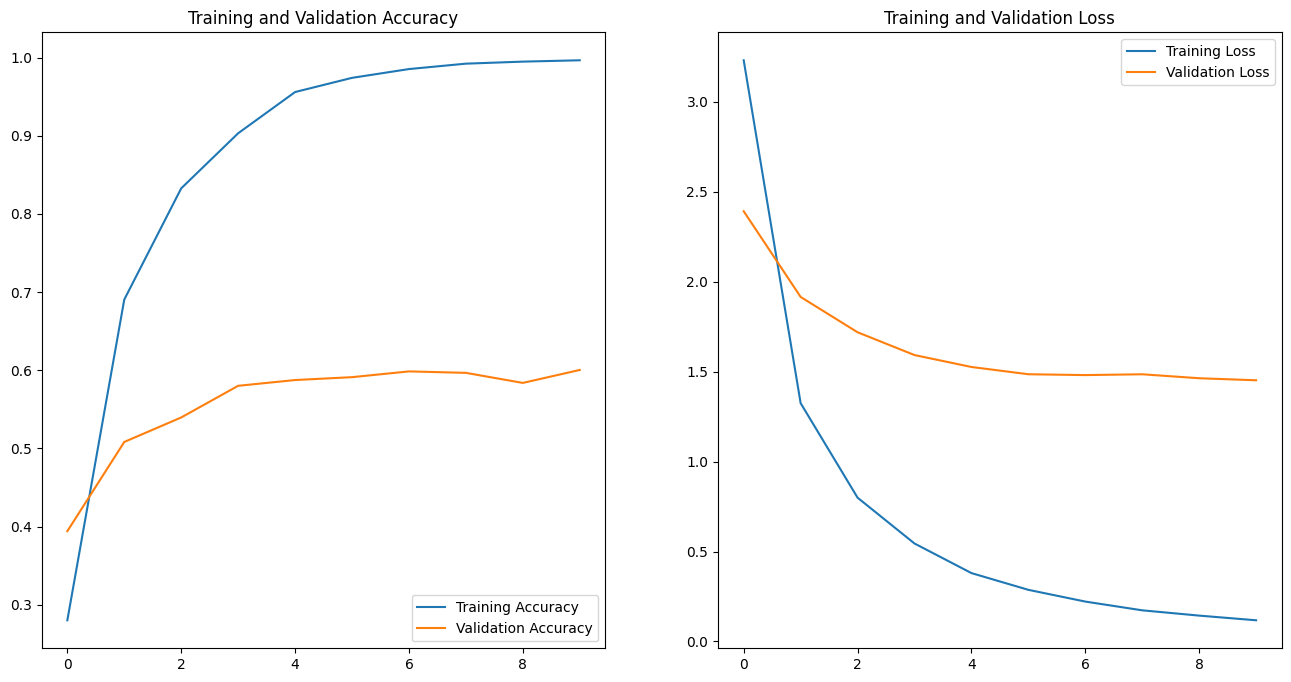

In [ ]:
# Evaluate on the test data
results = m.evaluate(validation_generator, batch_size=32)
print("test loss, test acc:", results)

# Plot training history
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# . Model Evaluation and Insights
 loss: 1.4521 - accuracy: 0.6004 test loss, test acc: [1.4520986080169678, 0.600368320941925]
 The fine-tuned model achieves a test loss of approximately 1.4521 and a test accuracy of approximately 60.04%.

Result Analysis of Results
- Test Loss: The test loss represents the average loss incurred by the model on the testing set. A lower test loss indicates better performance, as it means the model's predictions are closer to the ground truth labels on average. In this case, the test loss is relatively high, suggesting that the model's predictions are not very confident or accurate.

-Test Accuracy: The test accuracy indicates the proportion of correctly classified instances in the testing set. While a test accuracy of 60.04% is good.

Challenges Encountered:
- Suboptimal Performance: The relatively high test loss and moderate test accuracy suggest that the model may not be performing optimally. This could be due to various factors such as model architecture, hyperparameters, dataset quality, or training methodology.

Strategies for Improvement:
- Model Architecture: Experiment with different architectures (e.g., deeper or wider networks, different types of layers) to see if performance improves.
- Hyperparameter Tuning: Fine-tune hyperparameters such as learning rate, batch size, and regularization strength to find configurations that yield better performance.
- Data Augmentation: Increase the diversity of the training data through techniques like rotation, scaling, or adding noise to improve the model's ability to generalize.
- Ensemble Methods: Combine multiple models trained with different initializations or architectures to leverage their strengths and mitigate individual weaknesses.
- Regularization: Apply regularization techniques such as dropout, weight decay, or early stopping to prevent overfitting and improve generalization.
- Feature Engineering**: Explore the possibility of incorporating additional features or engineering existing ones to provide more discriminative information to the model.